<a href="https://colab.research.google.com/github/Praveen-Progs-Hub-2018/Text-Processing-with-NLTK/blob/master/NER_Morning_Star.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
"""
Email = praveenkumar.3it@gmail.com
Date  = 28-Aug-2021
"""

'\nEmail = praveenkumar.3it@gmail.com\nDate  = 28-Aug-2021\n'

## Import libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
class Utility():
  """  This Class is useful to adpat the Train or Test or Eval Datasets to do the common data pre-processing be train/test/eval """
  
  def __init__(self,train_file_path,train_tag_file_path):
    self.train_file_path = train_file_path
    self.train_tag_file_path = train_tag_file_path

  def load_input_train_files(self):
    """  load_input_train_files """

    file_1 = open(self.train_file_path, mode= 'r+', encoding='utf-8')
    file_2 = open(self.train_tag_file_path, mode= 'r+', encoding='utf-8')

    texts = [ i.rstrip() for i in file_1.readlines()]
    tags  = [ i.rstrip() for i in file_2.readlines()]
    return texts,tags

  def get_Prep_Dataframe(self,texts,tags):
    """ prepare the data """
    
    sentences = []
    for index in range(len(texts)):
      sent_1 = texts[index].split()
      sent_2 = tags[index].split()
      for i in range(len(sent_1)):
        sentences.append([index,sent_1[i],sent_2[i]])
    data = pd.DataFrame(data=sentences, columns=['Id','word','label' ])
    return data

  def prep_ListOf_Tuplesof_TokenTags(self, df):

    """ prep_ListOf_Tuplesof_TokenTags """

    goupby_sent_func = lambda param: [(w,  l) for w, l in zip(param["word"].values.tolist(),param["label"].values.tolist())]
    grouped = df.groupby("Id").apply(goupby_sent_func)
    sentences = [group for group in grouped]
    return sentences

<h4>  Config Params for the client side code</h4>
This is will helps the user to navigate the code to run from his local file paths

In [ ]:
train_file_path     = "eng_train.txt"
train_tag_file_path = "eng_train_tag.txt"
test_file_path     = "eng_test.txt"
test_tag_file_path = "eng_test_tag.txt"

## Load the Files , PreProcess it

In [75]:
util        = Utility(train_file_path,train_tag_file_path)
texts,tags  = util.load_input_train_files()
data        = util.get_Prep_Dataframe(texts,tags)
data.head(5)

,Id,word,label
0,0,EU,B-ORG
1,0,rejects,O
2,0,German,B-MISC
3,0,call,O
4,0,to,O


So far we are loaded the text train data and tags data. later we mapped both of them respectively. 

For example "EU rejects German call to boycott British lamb ." is mapped to correspoinding tags that is, B-ORG O B-MISC O O O B-MISC O O


Later we created the Id column which is unique to each document. Also after the get_Prep_Dataframe we will be able to see a data frame with each row represents a word in the text its respective taged lable.


In [4]:
print("Unique words in corpus:", data['word'].nunique())
print("Unique labels in corpus:", data['label'].nunique())

words = list(set(data["word"].values))
words.append("ENDPAD")
num_words = len(words)

labels = list(set(data["label"].values))
num_label = len(labels)

print(" No. Of   Words   : ",num_words)
print(" No. Of   Labels  : ", num_label)

Unique words in corpus: 23623
Unique labels in corpus: 9
 No. Of   Words   :  23624
 No. Of   Labels  :  9


Total No.of unique words in the corpus is 23623 and the 9 unique labels tagged

Now, lets create the golbals dictionaries for text and tags seperately which yeils a unique number for each text,tag as the dictionary keys.

This will be latere user to create the X ,Y data 

In [5]:
sentences = util.prep_ListOf_Tuplesof_TokenTags(data.copy())
word2idx  = {w: i + 1 for i, w in enumerate(words)}
label2idx = {l: i for i,l in enumerate(labels)}

# <h3>Analyze the data to Fix Max Lenth of the your X-Vector Size

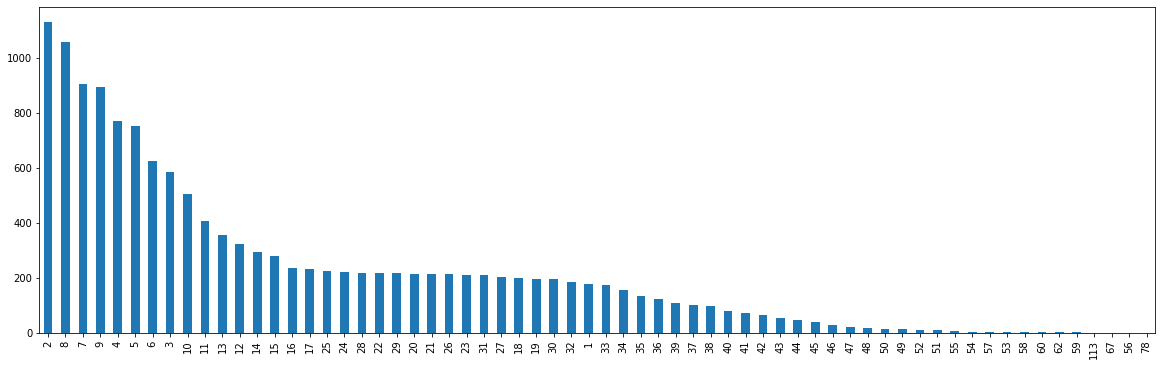

In [6]:
d={}
for s in sentences:
  if len(s) not in d.keys():
      d[len(s)]  = 1
  else:
        d[len(s)] +=1

sent_len_df = pd.DataFrame([len(s) for s in sentences],columns=['sent_len'])#,columns=['Sent_len','Freq'])
sent_len_df['sent_len'].value_counts()[:].plot(kind='bar', figsize=(20,6))

After ploting the unique document lenght and its frequency of documnets we got see the number document greater than 50 lenghth is almost in single digits.

So to avoid the sparsity of the X data in later secions we can fix the max token size 50.

In [7]:
sent_len_df = pd.DataFrame(list(d.items()),columns=['sent_len','docs_count'])#,columns=['Sent_len','Freq'])
sent_len_df = sent_len_df.sort_values('sent_len')
sent_len_df.tail(15)

,sent_len,docs_count
46,50,15
51,51,10
43,52,11
56,53,3
48,54,4
57,55,5
60,56,1
53,57,3
52,58,2
61,59,2


# <H1>Prepare (X,Y)

Senstecne variable is the list of tupulse word, its tagged label 

We will retrive the each word from every tuple later we will pull its correspoinding the numerical values from the word-gloabal dict 

The same way we will retrive the each tag-label from every tuple later we will pull its correspoinding the numerical values from the label-gloabal dict 



In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

max_len = 50
X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)
y = [[label2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=label2idx["O"])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


<h4> Prepared the X and Y</h4>


<html><font color='red'

X  = will looks like 

array([18706,   642, 22099, 23385,  7330, 21151,  9721, 15224, 10951,
       23623, 23623, 23623, 23623, 23623, 23623, 23623, 23623, 23623,
       23623, 23623, 23623, 23623, 23623, 23623, 23623, 23623, 23623,
       23623, 23623, 23623, 23623, 23623, 23623, 23623, 23623, 23623,
       23623, 23623, 23623, 23623, 23623, 23623, 23623, 23623, 23623,
       23623, 23623, 23623, 23623, 23623], dtype=int32) 
></html>
<html><font color ='blue'

y =  will looks like 

array([1, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)


We Aslo splitted the datapoins 80:20 for training and testing respectively

</font>



**Modeling**

In [9]:
!pip install livelossplot==0.5.2

In [10]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# from livelossplot.tf_keras import PlotLossesCallback
from livelossplot.inputs.tf_keras import PlotLossesCallback

# Network Architecture



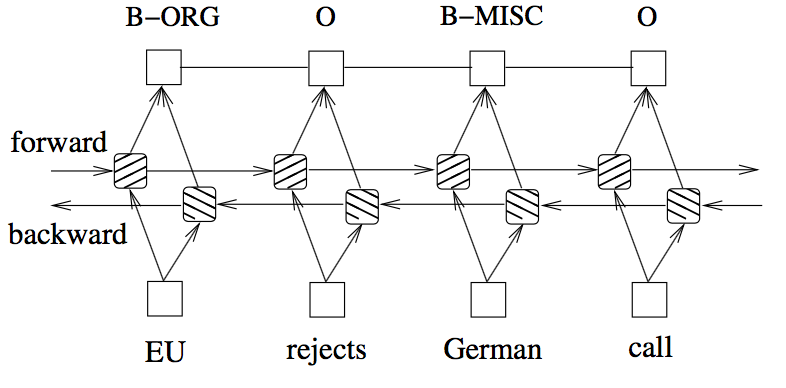

## **Build Network**

In [11]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=max_len, input_length=max_len)(input_word)
model = SpatialDropout1D(0.2)(model)
model = Bidirectional(LSTM(units=200, return_sequences=True, recurrent_dropout=0.3))(model)
out   = TimeDistributed(Dense(num_label, activation="softmax"))(model)
model = Model(input_word, out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 50)            1181200   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 50)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 400)           401600    
_________________________________________________________________
time_distributed (TimeDistri (None, 50, 9)             3609      
Total params: 1,586,409
Trainable params: 1,586,409
Non-trainable params: 0
_________________________________________________________________


Embedings Layer : Turns give  intege (indexes) into dense vectors of fixed size.
e.g. [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]

SpatialDropout1D : If the feature maps are strongly correlated then regular dropout will not regularize the activations and will otherwise just result in an effective learning rate decrease


Bidirectional(LSTM) : It is Bidirectional LSTM Layer


TimeDistributed    : It allows to use a layer for each input. That means that instead of having several input “models”, we can use “one model” applied to each input


Below We are using the  EarlyStopping with few callback so that we don’t need to hard code the number of epochs. If our network doesn’t improve for 2 consecutive epochs,i.e. validation loss is not decreased we are going to stop our training process. That is the meaning of patience.






## **Model Train**

In [12]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

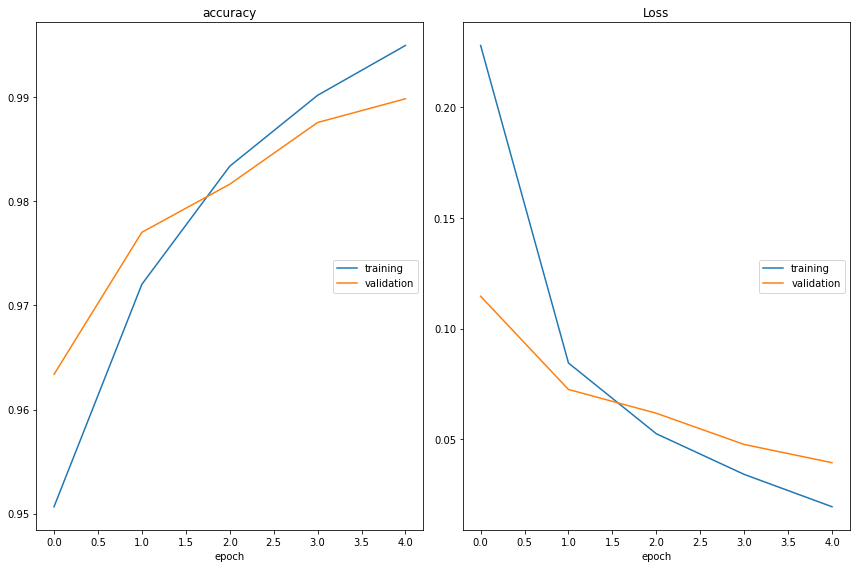

accuracy
	training         	 (min:    0.951, max:    0.995, cur:    0.995)
	validation       	 (min:    0.963, max:    0.990, cur:    0.990)
Loss
	training         	 (min:    0.020, max:    0.228, cur:    0.020)
	validation       	 (min:    0.039, max:    0.115, cur:    0.039)

Epoch 00005: val_loss improved from 0.04768 to 0.03945, saving model to model_weights.h5


In [13]:
chkpt          = ModelCheckpoint("model_weights.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=2, verbose=0, mode='max', baseline=None, restore_best_weights=False)
callbacks      = [PlotLossesCallback(), chkpt, early_stopping]
history        = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=32,epochs=5,callbacks=callbacks,verbose=1)

In [14]:
model.evaluate(x_test, y_test)

88/88 [==============================] - 5s 57ms/step - loss: 0.0394 - accuracy: 0.9898


[0.03944801539182663, 0.9898255467414856]

[0.03944801539182663, 0.9898255467414856]

first value in the above list represents loss which is 0.04

second value in the above list represents accuracy which is 0.98

# Model Predictions on the DataSet

**Load and Preprocess**

In [15]:
test_util        = Utility(test_file_path,test_tag_file_path)
test_texts,test_tags = test_util.load_input_train_files()
test_data       = test_util.get_Prep_Dataframe(test_texts,test_tags)
test_sentences  = test_util.prep_ListOf_Tuplesof_TokenTags(data.copy())
max_len = 50

**Convert to Model Input format**

In [47]:
X_text_test= [[word2idx[w[0]] for w in s] for s in test_sentences]
X_test = pad_sequences(maxlen=max_len, sequences=X_text_test, padding="post", value=num_words-1)
y_text_test = [[label2idx[w[1]] for w in s] for s in test_sentences]
y_test = pad_sequences(maxlen=max_len, sequences=y_text_test, padding="post", value=label2idx["O"])


model.evaluate(X_test, y_test)

439/439 [==============================] - 25s 58ms/step - loss: 0.0168 - accuracy: 0.9958


[0.01679106429219246, 0.995830774307251]

**Generate Predictions**

In [19]:
preds = model.predict(X_test)
preds = np.argmax(preds, axis=-1)

In [ ]:
out = []
for pred_i in pred:
    out_i = []
    for p in pred_i:
        p_i = np.argmax(p)
        out_i.append(idx2tag[p_i].replace("PAD", "O"))
    out.append(out_i)

In [ ]:
print(classification_report(test_labels, preds))

Let us now visualize and understand how the prediction are coming upon  the actual text and the tags

We expecte the predicted tags should be equal to the actual tag of a particular token


In [91]:
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(test_sentences[0], y_test[0], preds[0]):
    print("{:15}{}\t{}".format(w[0], labels[true], labels[pred]))


Word           True 	 Pred

------------------------------
EU             B-ORG	B-ORG
rejects        O	O
German         B-MISC	B-MISC
call           O	O
to             O	O
boycott        O	O
British        B-MISC	B-MISC
lamb           O	O
.              O	O


In [ ]:
# for index in range(10000):
#   total_uniq_list = []
#   uniq_text_list =  []
#   for i in next(file_1).split():

#     if i not in uniq_text_list:
#       uniq_text_list.append(i)
#       total_uniq_list.append(i)

#   uniq_tags_list =  [] 
#   for i in next(file_2).split():
#     if i not in uniq_tags_list:
#       uniq_tags_list.append(i)
#       total_uniq_list.append(i)


